# Masters Thesis Visualisation Notebook

The code shown below is an extract of the entire jupyter notebook that was actually used. The significant pieces of code and examples are shown within this Jupyter Notebook. But before jumping into the code, I would like to address and show the problem that was being solved with this piece of code.

## Problem

As part of my Masters thesis, I had over 100 CSV files with about 40 columns of results data for each experiment. Initially, to analyse this data and compare the results from the different tests, I had to open each csv file and manually copy and paste the columns into a single sheet in order to draw a graph in excel. This was extremely timeous and inefficient taking about 20 minutes to draw just one graph. Especially considering that often when analysing results, graphs need to be redrawn in order to make observations and investigate different aspects of the experiments. This quickly became an issue as I was completing my thesis alongside working my job and time was not on my side. I started looking at open source and commercial tools that could be used in assisting me with downloading CSV files and rapidly drawing professional graphs. However, another problem was identified with current graphing tools. 

When importing different lines to draw on a single graph, the programmes automatically graph all the respective y values with the x value of the initial data set and not the x value of the respective test file. This produced unreliable results which were not accurate. This was noticed when the graphs that were being drawn were not the results we were expecting. To illustrate this, the following table shows three simple data sets with respective x and y values. 

### Set 1
| Time (s) | Speed (m/s) |
| --- | --- |
| 0 | 1 |
| 1 | 2 |
| 2 | 3 |
| 3 | 4 |
| 4 | 5 |

### Set 2
| Time (s) | Speed (m/s) |
| --- | --- |
| 0 | 1 |
| 0.5 | 2 |
| 1 | 3 |
| 1.5 | 4 |
| 2 | 5 |

### Set 3
| Time (s) | Speed (m/s) |
| --- | --- |
| 0 | 1 |
| 2 | 2 |
| 4 | 3 |
| 6 | 4 |
| 8 | 5 |

Potting these three results by importing it into most graphing tools resulted in the following graph. Note how the Speed value was automatically assigned to the x value of the initial dataset rather than its own independant value.

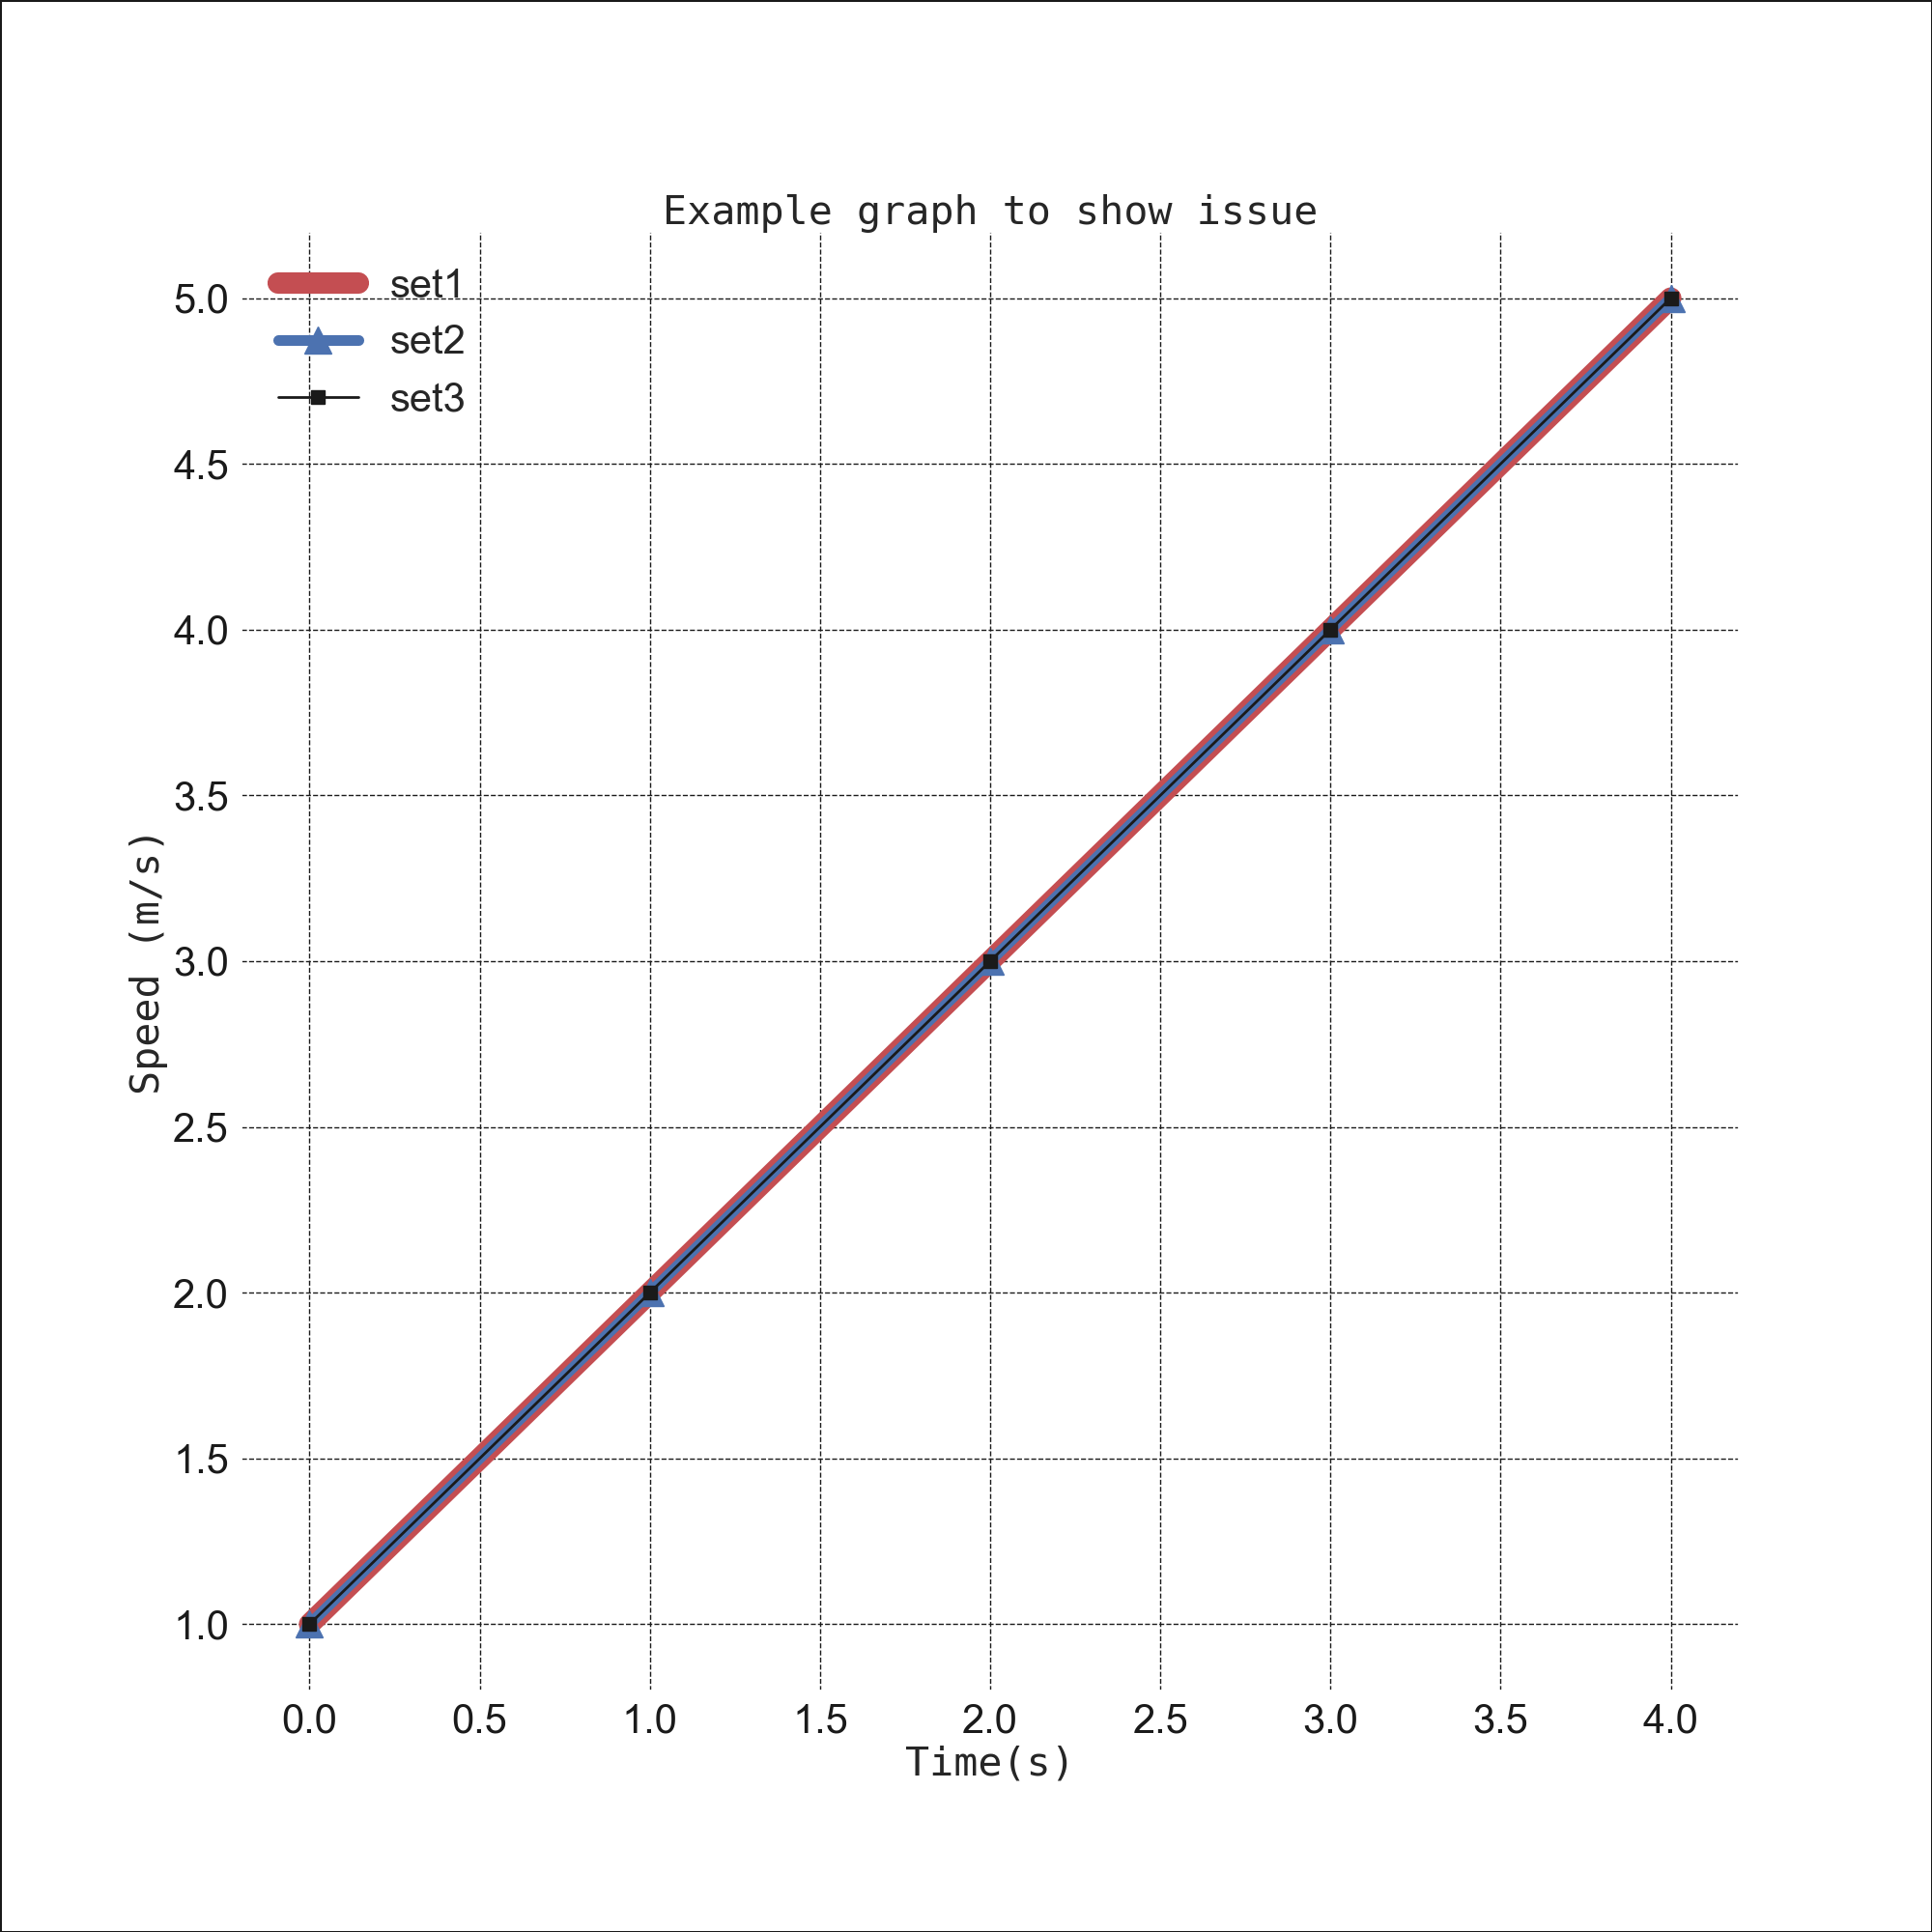



The above graph shows that the three items accelerated at the same rate.The Next graph shows how the lines should actually be drawn to accurately represent the data. 

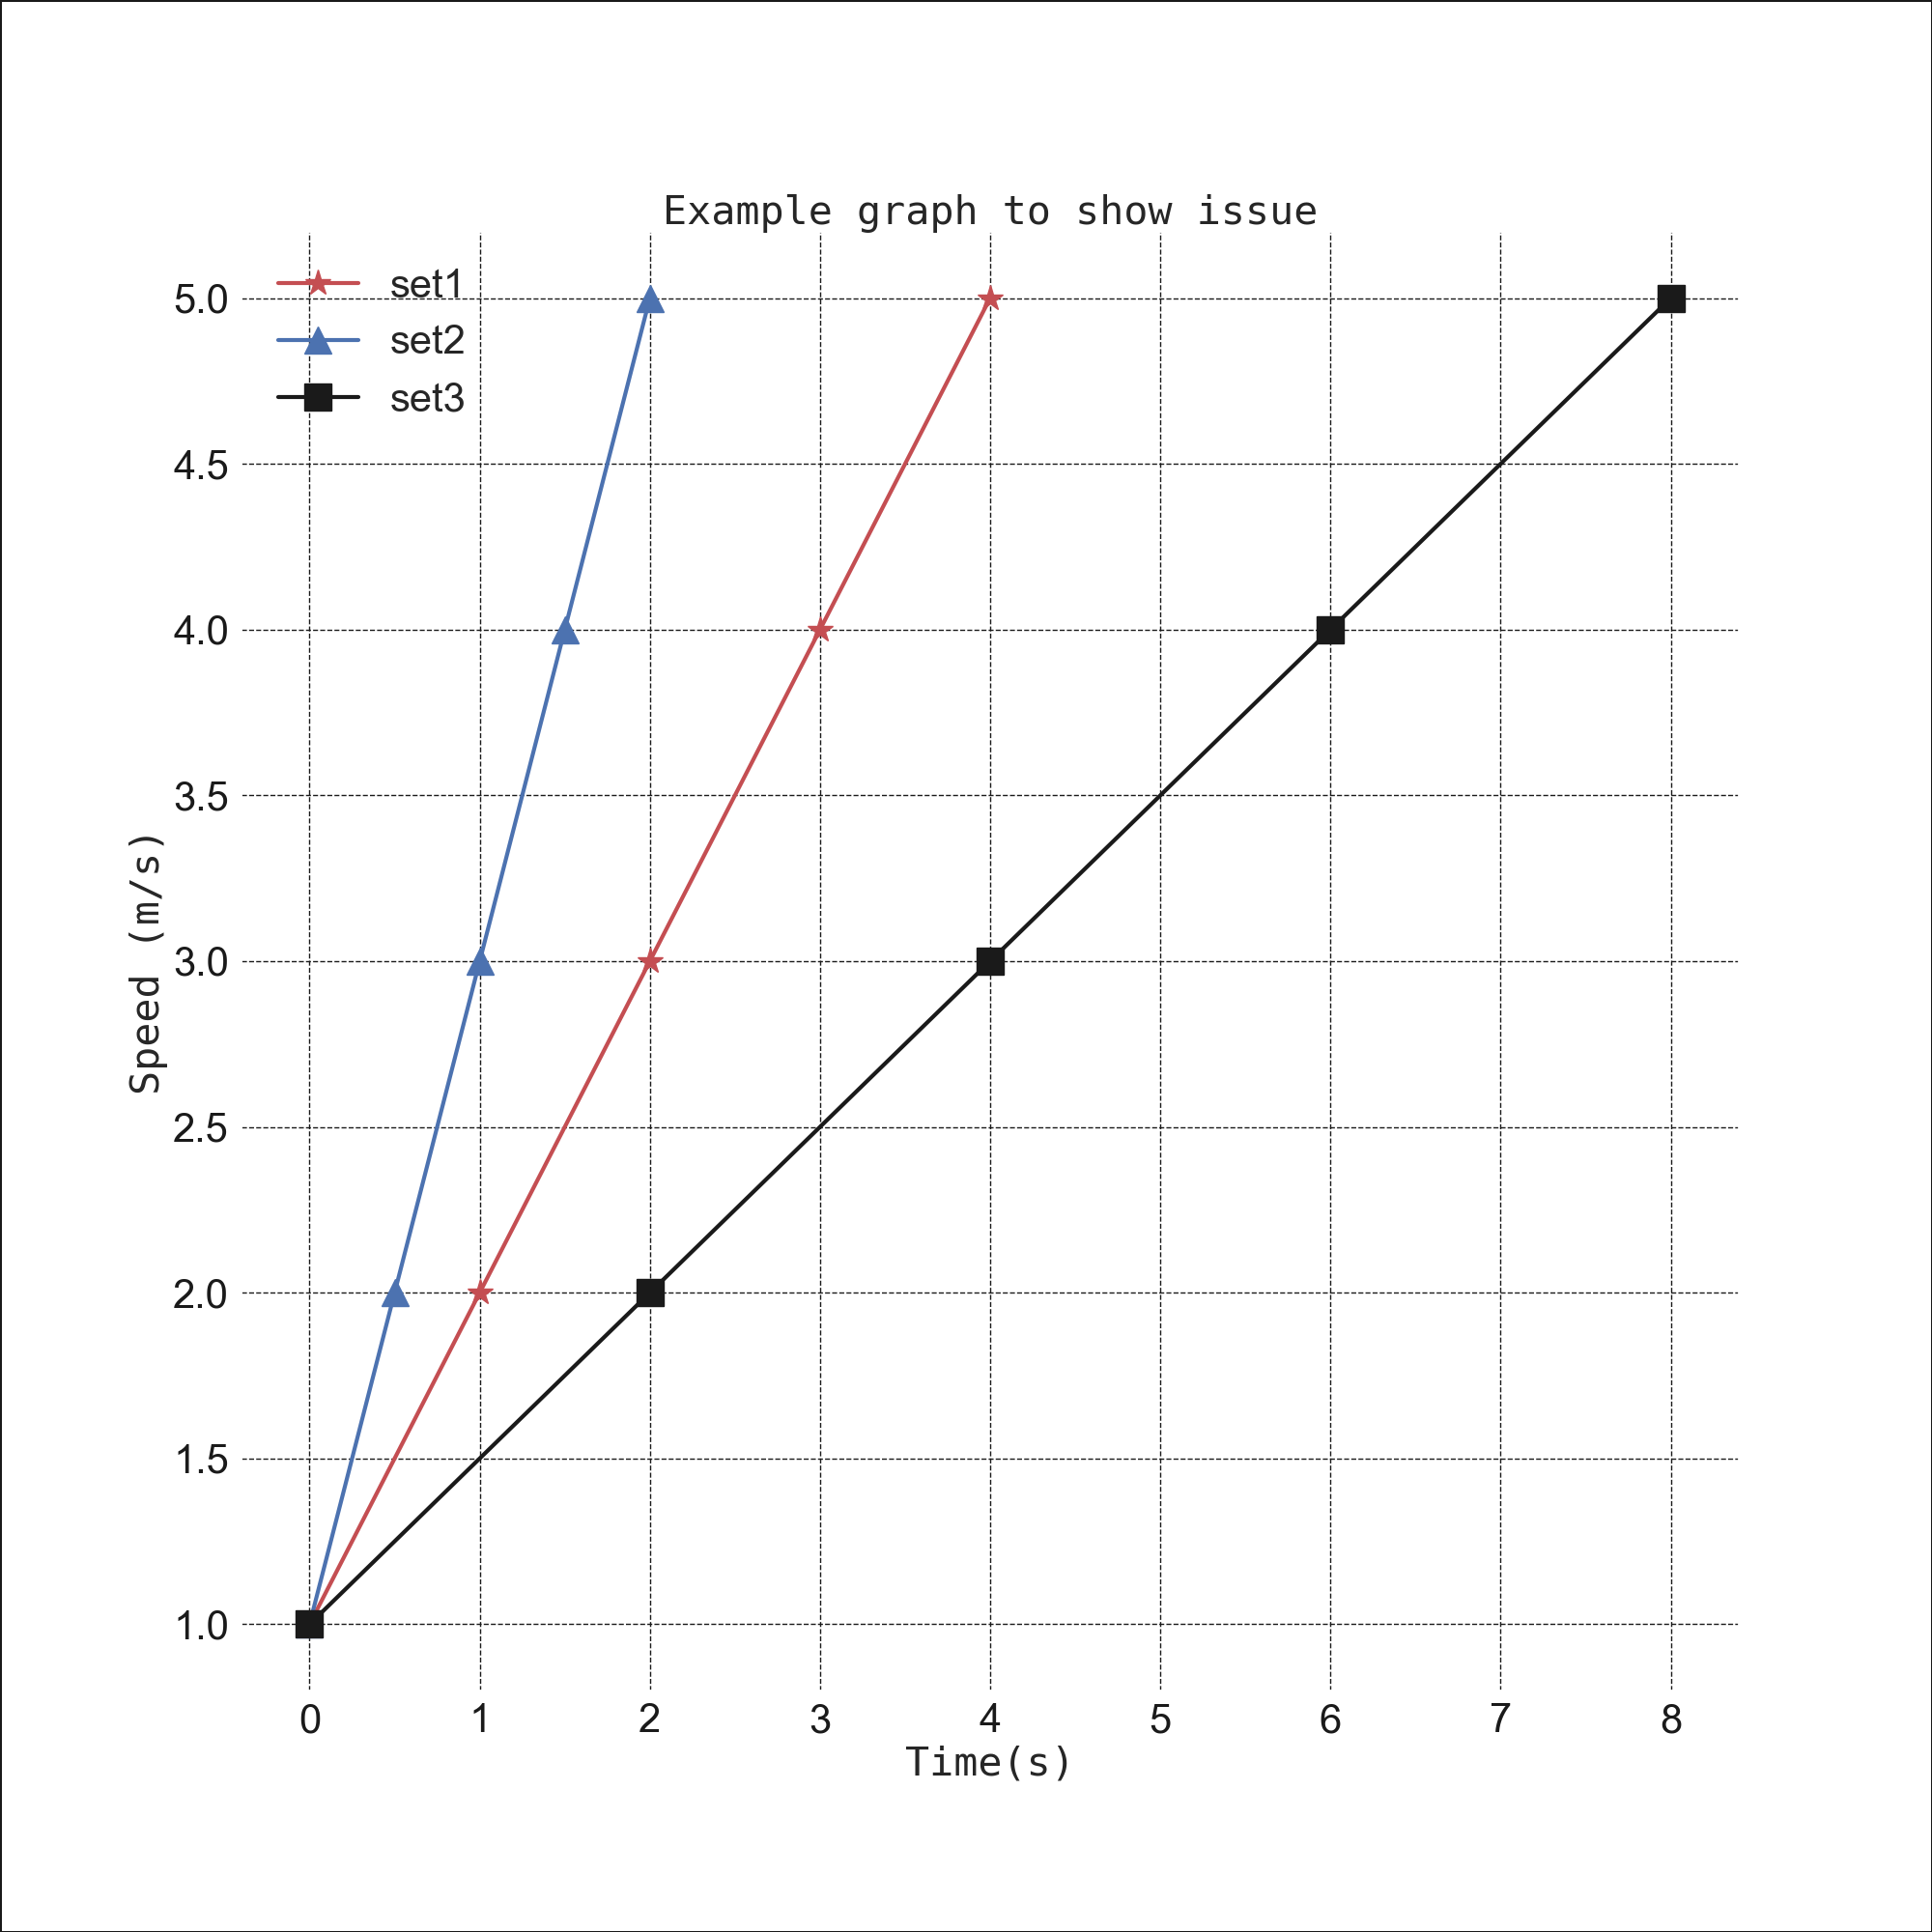

Note how the data tells a significantly different story due to a discrepency with plotting. Although this graph simplifies the problem and makes it obvious, looking at the complex data in the CSV files (or example graphs further down) will quickly demonstrate how easily this could have been missed and the issues attributed to something else such as the setup of the simulation. 

Therefore, the following block of code automatically plots the respective line graphs independantly of the other datasets to accurately demonstrate the results. In doing this, drawing a graph was a quick two minutes and the analysis of my dissertation results were done in a signficantly lower amount of time while also producing professional looking graphs that are consistent in styling. Speaking of styling, I also saved a significant amount of time in editing the style of the graphs as the default graphs of these programmes were often not the most professional looking and what was preferred by my supervisor.

In [3]:
#Importing all necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline
sns.set()

In [4]:
# This section of code imports CSV files and will make it simpler to choose columns and data to visualise within the the selected python library
def get(filename):
    file = "Results DataNEW" + filename + ".xls" + ".csv" #This is strange as the results data files were saved like this
    path = "Data/" + file
    df = pd.read_csv(path, encoding='cp1252')
    df = df.drop(columns="Unnamed: 0")
    return df

The next block of code sets up the function that will be used as a call to quickly graph various properties

In [5]:
#Properties that can be changed for the graph
# These properties become the default settings
fontsize= 30       #Font size of the headings
markersize=20      #Size of the markers
Colours=['k','r','b','g','y','#ff7f0e','#8c564b','m','c','#7f7f7f']  #Colours for respective line graphs
markers=['o','^','s','D','*','p','P','X','h','+']     #Selection of marker types that can be used
TITLE=""    #Title of the graph
XLABEL=""   #X axis Label for the graph
YLABEL=""   #Y axis label for the graph
Y2LABEL=""  #Secondary Y axis label for the graph
colx="Time [s]"  #X axis column name in CSV results file
coly="[H] Directional Velocity Flexible (Max) [m/s]"     #Y axis column name in CSV results file
coly2=""       #Secondary Y axis column name in CSV results file
Testlist=[]    #CSV file list for different test results
linelabels=[]   #Labels to be used for the different Lines
FILENAME=""     #Name of the jpeg file to save the graph
xmult=1         #X axis multiplier which assists with scaling the data values
ymult=1         #Y axis multiplier which assists with scaling the data values
y2mult=1        #Secondary Y axis multiplier which assists with scaling the data values

def drawgraphs(Testlist,linelabels,TITLE,XLABEL,YLABEL,colx,coly,xmult=1,ymult=1,y2mult=1, figsize=(20,20),coly2="hey",
               Y2LABEL="hey",fontsize=30,markersize=20,
               fontfamily='monospace',
               fontweight='medium',Colours=['k','r','b','g','y','#ff7f0e','#8c564b','m','c','#7f7f7f'],
              Markers=['o','^','s','D','*','p','P','X','h','+'],
              xl=False, xlim=(0,5), ylim=(5,10), yl=False, y2lim=(5,10), y2l=False, is2y=False, loc='best',
              name="checkname", alpha=0.5):  #Defining function and its parameters
    listLength= len(Testlist)
    fig = plt.figure(figsize=figsize, facecolor='w', dpi=200, edgecolor='k', linewidth=2)  #Creating a figure to draw on
    #plt.yscale("log")
    ax = fig.subplots()   #Creating an axes subplot to draw first y axis
    ax2=""
    if is2y:              #Checks if secondary y axis needed and initiates if required
        ax2 = ax.twinx()
        #ax2.axvline(0, color='black', lw=3)
    ax.axhline(0, color='black', lw=3)   #Defining and showing x=0 and y=0 lines
    ax.axvline(0, color='black', lw=3)
    cmarker=0    #Counters for colours and types of the markers used for the different lines
    mmarker=0
    labelcounter=0
    for i in Testlist:   #Iterates through the lists of tests and plots the line graphs as specified
        df=get(i)
        ax.plot(df[[colx]]*xmult, df[[coly]]*ymult, c=Colours[cmarker] , marker=Markers[mmarker], label=linelabels[labelcounter], lw=3, ms=markersize)
        if is2y: 
            ax2.plot(df[[colx]]*xmult, df[[coly2]]*y2mult, alpha=alpha,c=Colours[cmarker] , marker=Markers[mmarker], label=linelabels[labelcounter], lw=3, ms=markersize)
        labelcounter+=1
        cmarker+=1
        mmarker+=1

    ax.set(facecolor='white')   #Ensuring the background is white instead of the light blue

    ax.set_title(TITLE, fontsize=fontsize, fontfamily =fontfamily, fontweight =fontweight)  #Creating heading and labels
    ax.set_xlabel(XLABEL, fontsize=fontsize, fontfamily =fontfamily, fontweight =fontweight)
    ax.set_ylabel(YLABEL, fontsize=fontsize, fontfamily =fontfamily, fontweight =fontweight)
    if is2y:
        ax2.set_ylabel(Y2LABEL, fontsize=fontsize, fontfamily =fontfamily, fontweight =fontweight)
        
    ax.legend(fontsize=fontsize, loc=loc, frameon=False)   #Drawing Legend in required location

    ax.tick_params(which='major', colors='k', labelsize=fontsize, grid_color='k', grid_linewidth=2, grid_ls='--') #adjusting gridlines as necessary
    if is2y:
        ax2.tick_params(axis='both', which='major',colors='#7f7f7f', pad=10,labelsize=fontsize, grid_color='#7f7f7f', grid_linewidth=2, grid_ls=':')
        
    #Checks to see if you would like to add a limit to any of the axis and if not, the autoscaling can be done
    auto=True
    if xl:
        ax.set_xlim(xlim)
        auto=False
    else:
        g=1
    
    if yl:
        ax.set_ylim(ylim)
        auto=False
    else:
        g=1
    if is2y:  
        if y2l:
            ax2.set_ylim(y2lim)
            auto=False
        else:
            g=1  
    
    if auto:
        ax.autoscale()
    else:
        g=1
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    filename= name+".png"  #Saving the graph as a png file
    fig.savefig(filename)
    return fig,ax,ax2    #Necessary if would like to manipulate further outside of the function

# Example 1

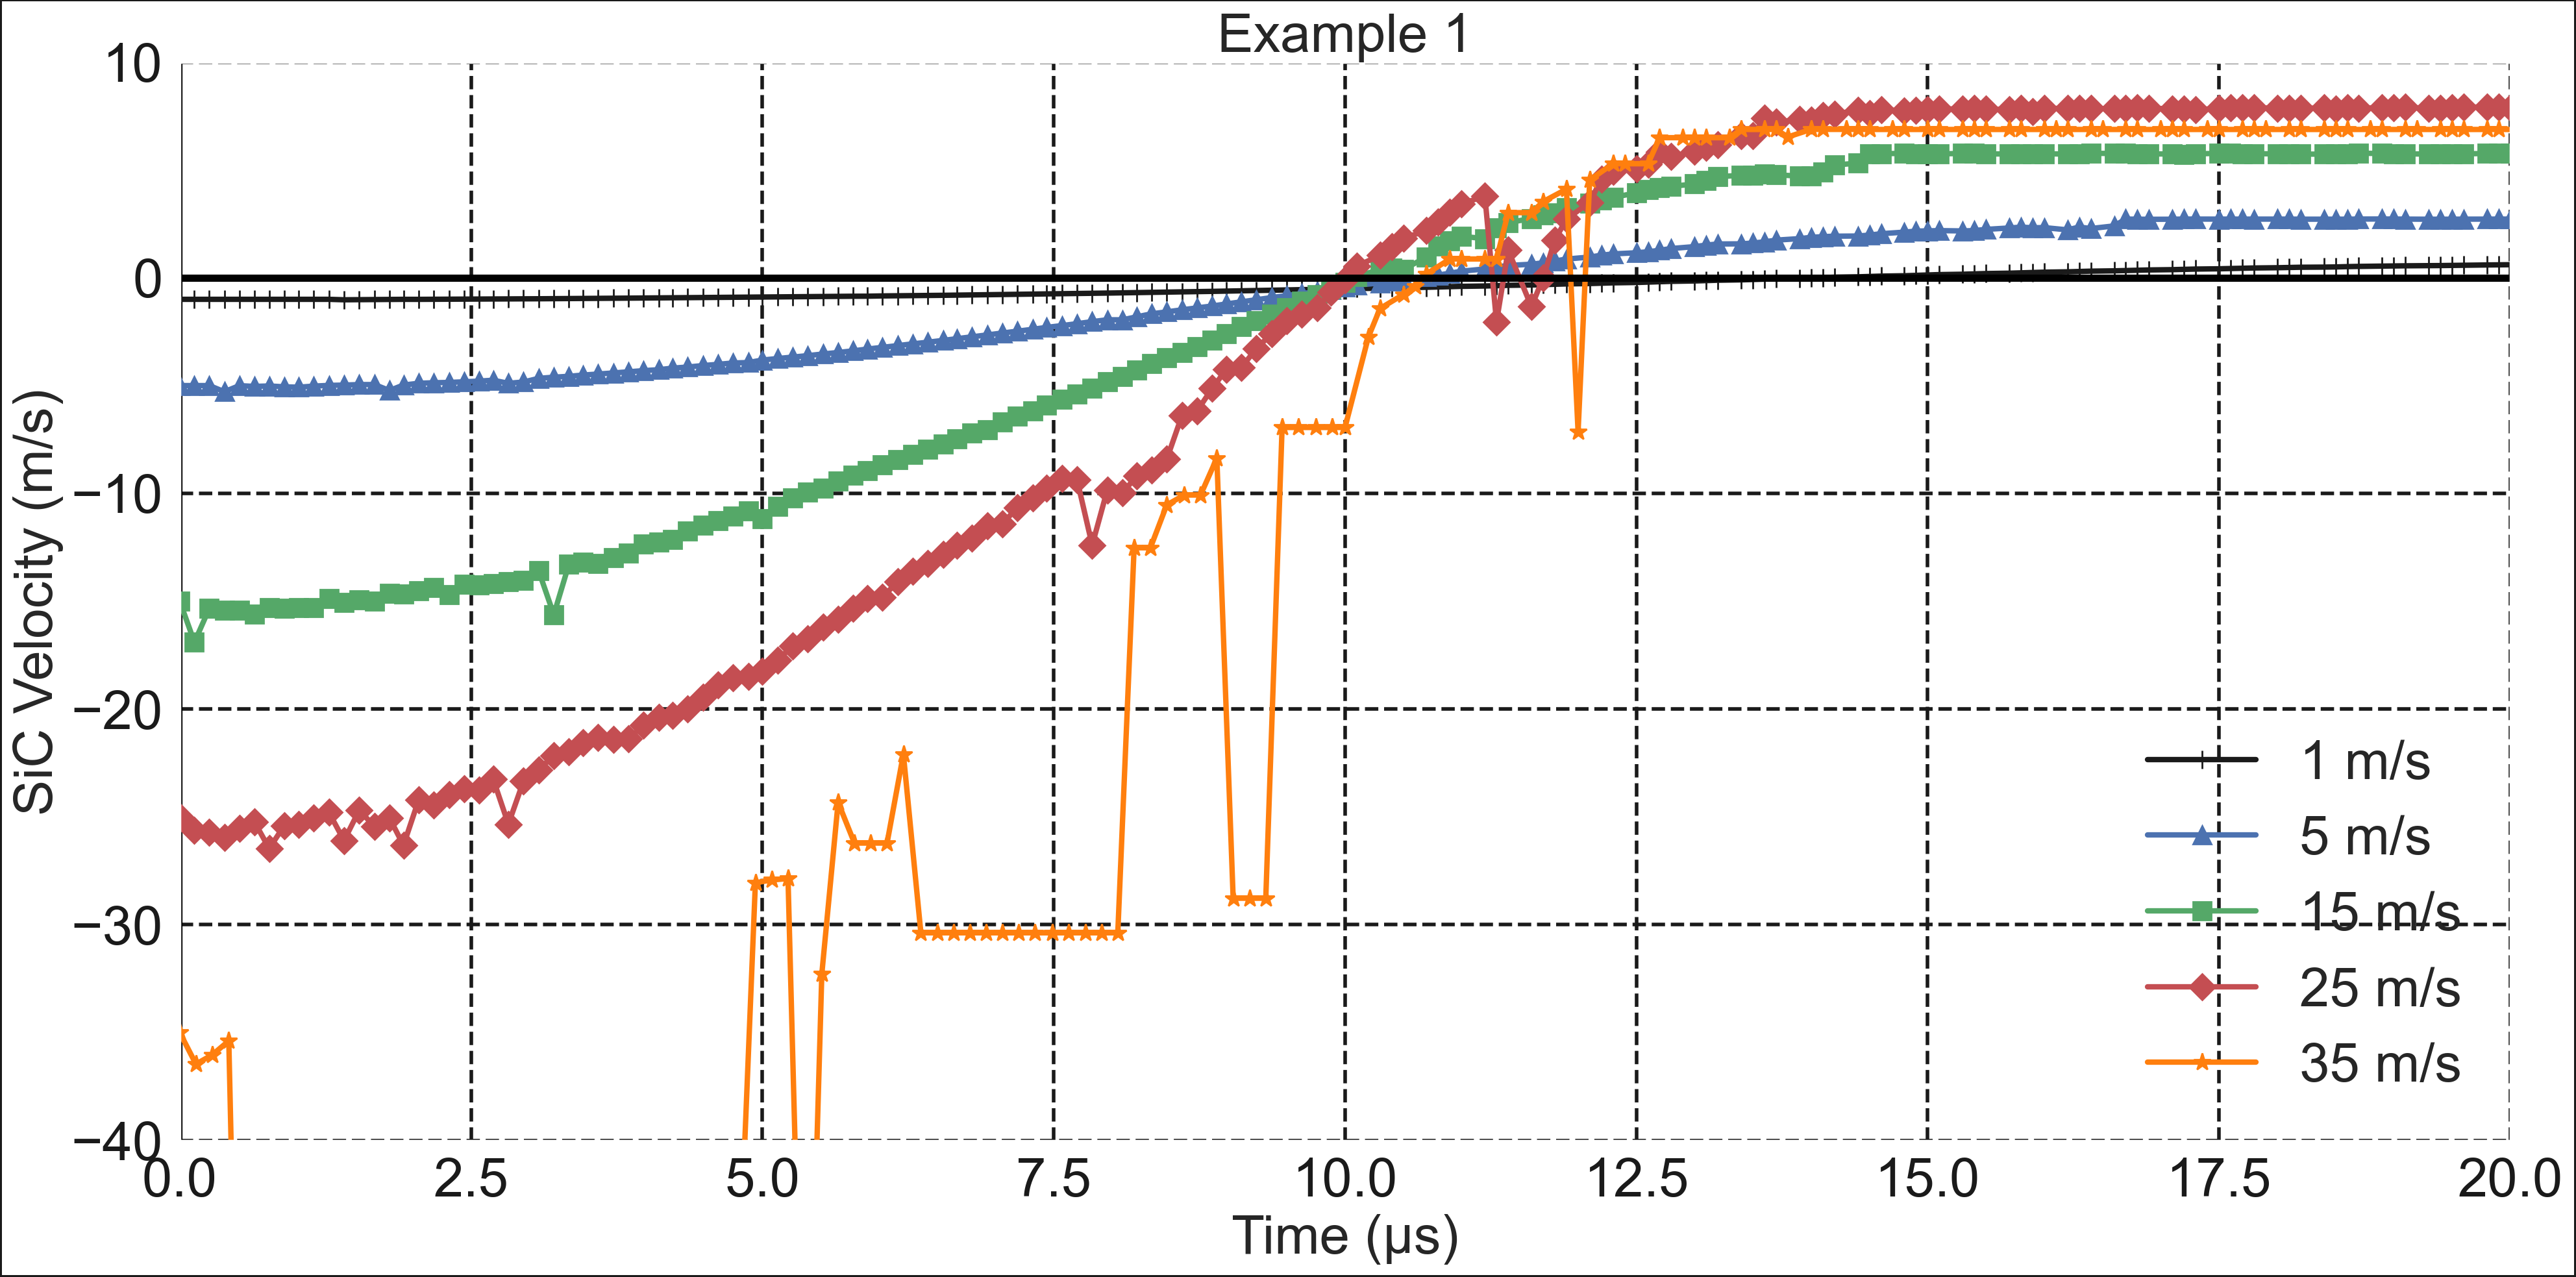

In [8]:
# Saving the file as ... and choosing the CSV files and labelling the different lines.
FILENAME="Example1"
Testlist=["T80", "T74", "T75", "T76","T66a"]
linelabels=["1 m/s","5 m/s","15 m/s","25 m/s","35 m/s"]

#Graph Labels
TITLE="Example 1"
XLABEL="Time (µs)"
YLABEL="SiC Velocity (m/s)"
Y2LABEL="Flexible Media Velocity (m/s)"
#these are the columns from the spreadsheets as well as the multiplier factors to assist with the scaling
colx="Time [s]"    #Dont change this ever
coly="[J] Directional Velocity SiC (Max) [m/s]"
coly='[I] Directional Velocity SiC (Min) [m/s]'
coly2="Average[m/s]"
#Scaling multipliers
xmult=1000000
ymult=1
y2mult=1

#This section decides on the limits if necessary
xl=True
xlim=(0,20)
ylim=(-40,10)
yl=True

#These parameters are for the second y axis
y2lim=(-6,5)
y2l=True

#This parameter decides the opacity of the second y axis line
alpha=0.2
is2y=False

#Format and styling Properties
figsize=(20,10)     #length, width (size of the graph)
Colours=["k",'b','g','r','#ff7f0e','#8c564b','m','c','#7f7f7f']
markers=['+','^','s','D','*','p','P','X','h','+']
fontsize= 30
markersize=10
fontweight='medium' 
fontfamily='sans-serif'  #Font that is used in the graph
loc='lower right'     #This determines the positioning of the legend (bestupper rightupper leftlower leftlower rightrightcenter leftcenter rightlower centerupper centercenter)

#The next block of code calls the function according to above requirements
fig, ax, ax2 = drawgraphs(Testlist=Testlist,linelabels=linelabels,TITLE=TITLE,XLABEL=XLABEL,YLABEL=YLABEL,
           figsize=figsize,colx=colx,coly=coly,coly2=coly2,xmult=xmult,ymult=ymult,y2mult=y2mult,Y2LABEL=Y2LABEL,
           fontsize=fontsize,markersize=markersize,Colours=Colours,fontfamily=fontfamily,fontweight=fontweight,
           Markers=markers,xl=xl, xlim=xlim, ylim=ylim, yl=yl, y2lim=y2lim, y2l=y2l, is2y=is2y,
           name=FILENAME, loc=loc, alpha=alpha)
ax.axhline(0, color='black', lw=4)

# Example 2

(<Figure size 2000x2000 with 2 Axes>,
 <AxesSubplot:title={'center':'Example 2'}, xlabel='Time (µs)', ylabel='Aspertiy Surface Deformation (µm)'>,
 <AxesSubplot:ylabel='Asperity Equivalent Stress (MPa)'>)

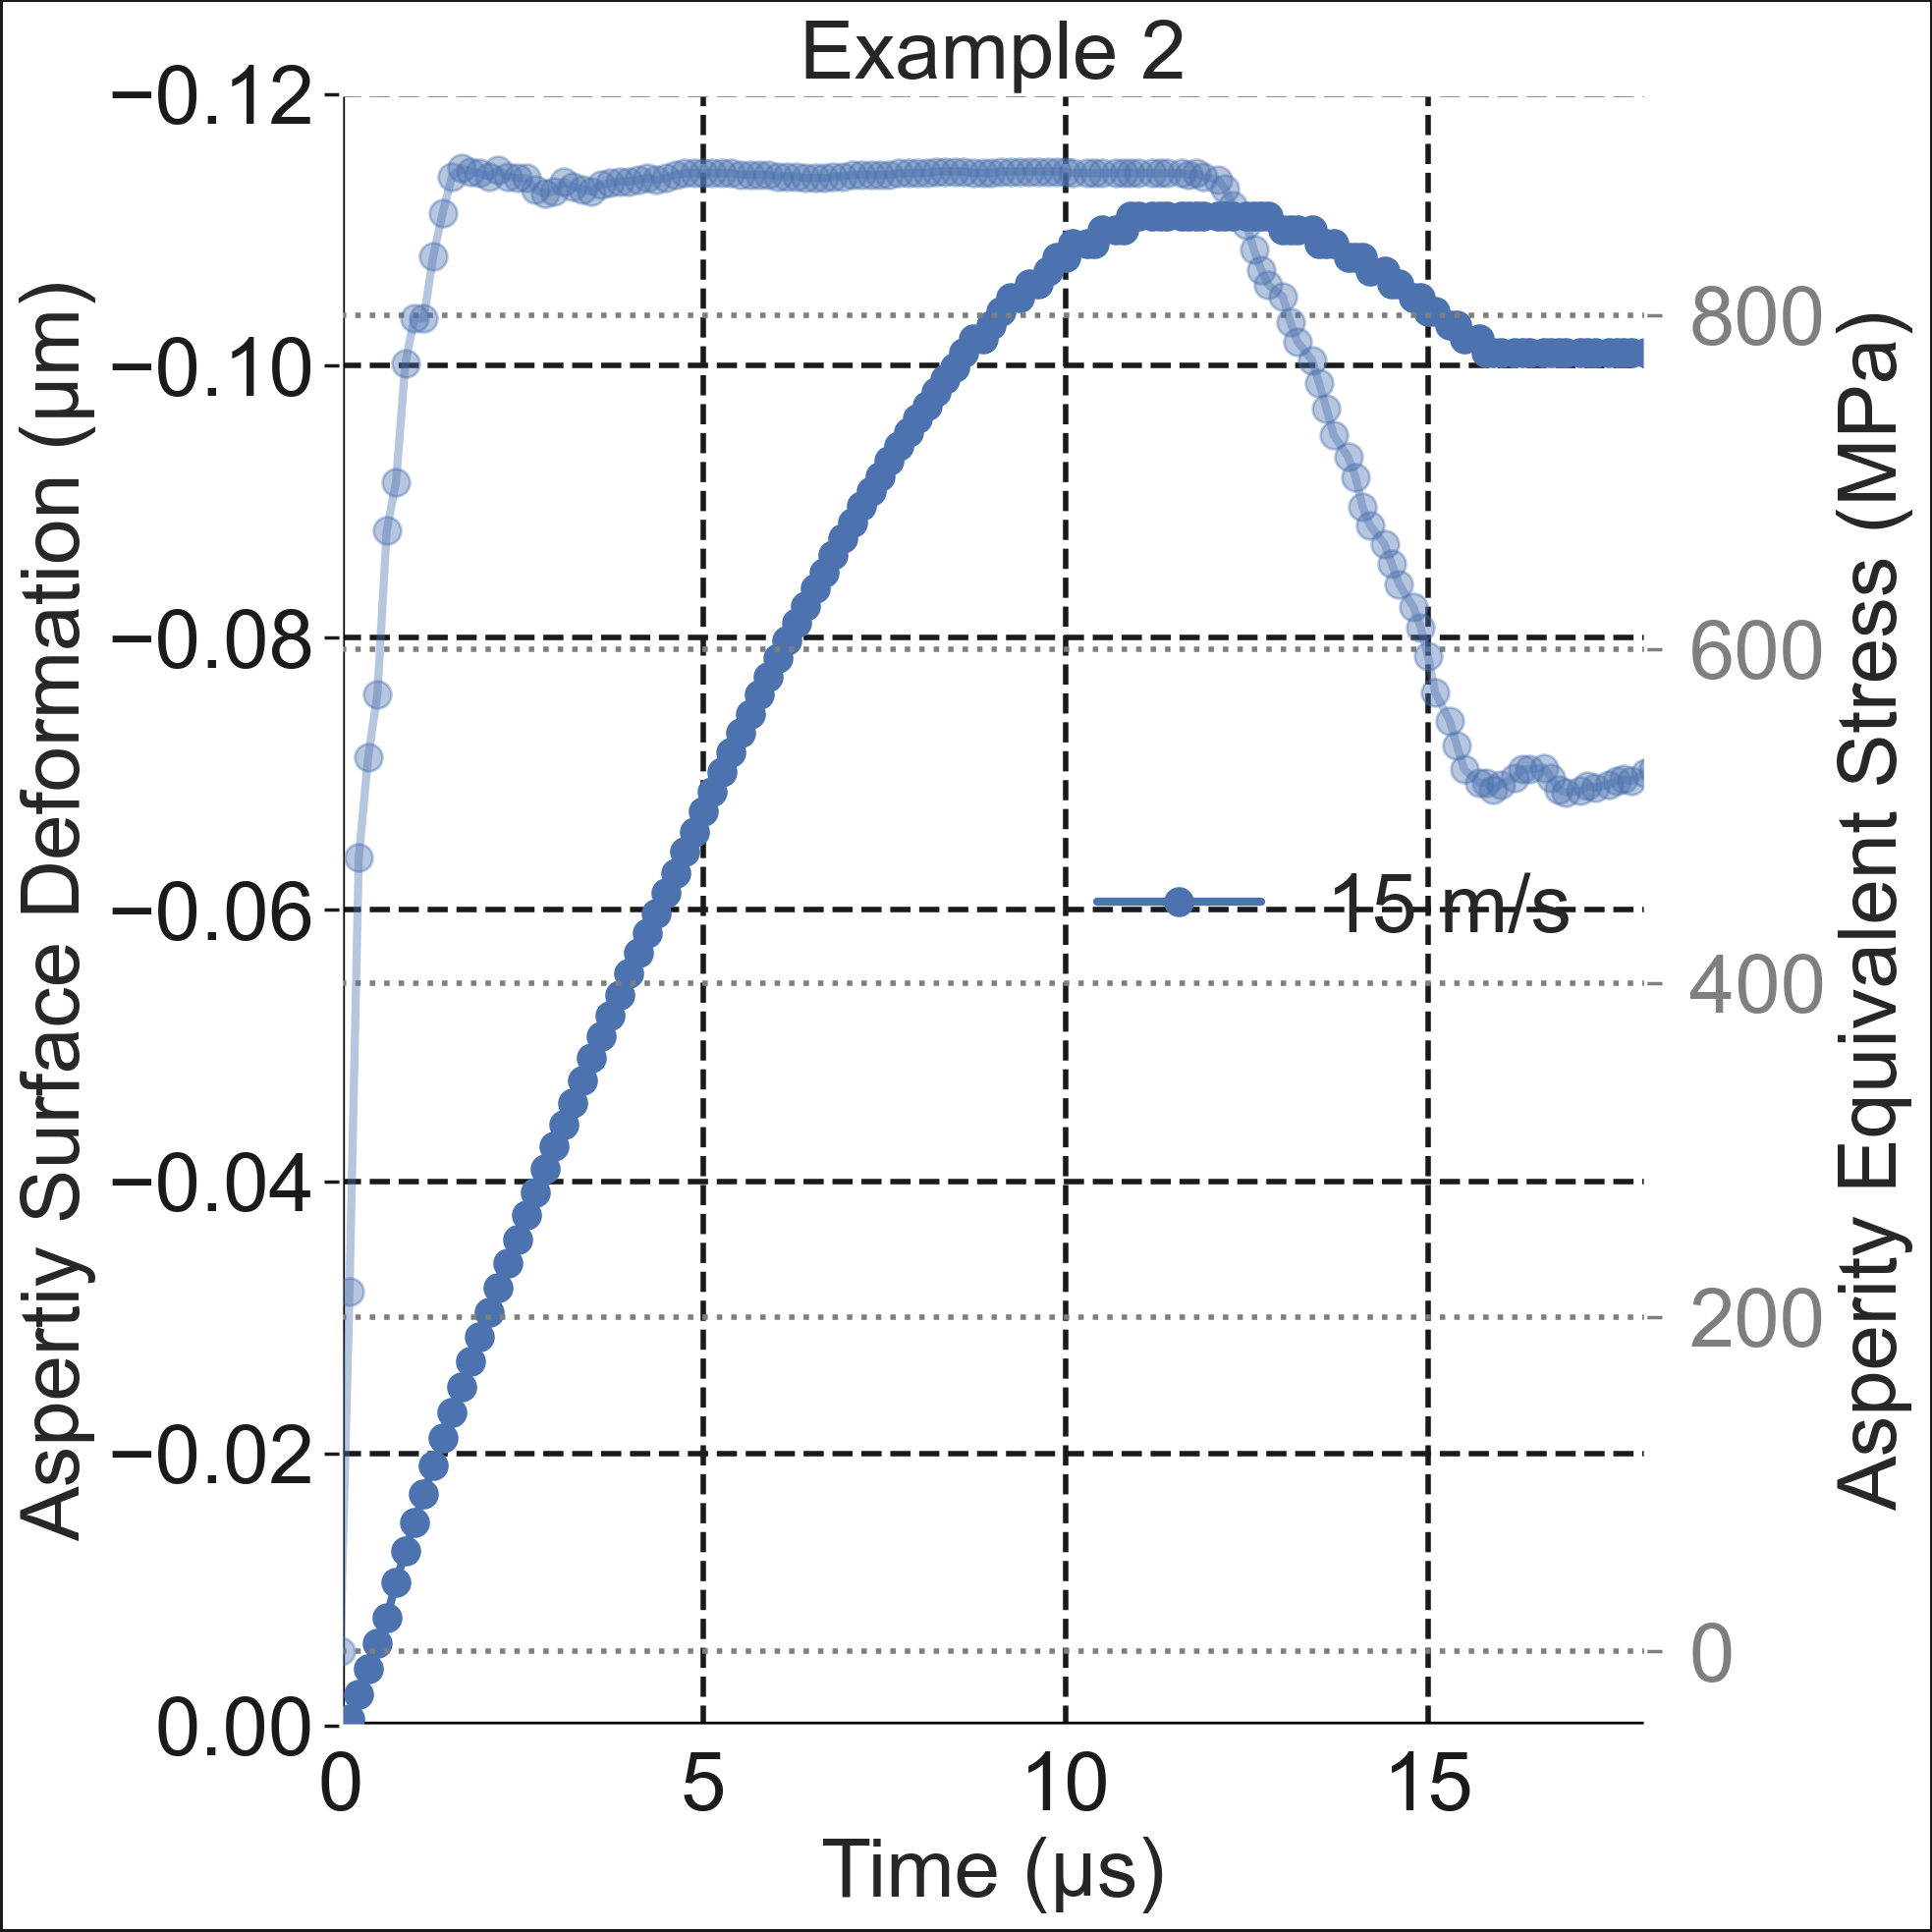

In [9]:
# This is the graph for
FILENAME="Example2"

#These are the properties for the specific graph to be drawn  µ
Testlist=["T78"]
linelabels=["15 m/s"]

#Graph Labels
TITLE="Example 2"
XLABEL="Time (µs)"
YLABEL="Aspertiy Surface Deformation (µm)"
Y2LABEL="Asperity Equivalent Stress (MPa)"

#these are the columns from the spreadsheets as well as the multiplier factors to assist with the scaling
colx="Time [s]"
coly="[F] Directional Deformation Asperity (Max) [m]"
coly="[E] Directional Deformation Asperity (Min) [m]"
coly2="[AD] Equivalent Stress Asperity (Max) [Pa]"
xmult=1000000
ymult=1000
y2mult=1/1000000

#This section decides on the limits if necessary
xl=True
xlim=(0,18)
ylim=(0,-0.120)
yl=True

#These parameters are for the second y axis
y2lim=(5,10)
y2l=False
alpha=0.4
is2y=True

#Format and styling Properties
figsize=(10,10)     #length, width
Colours=['b','g','k','y','#ff7f0e','#8c564b','m','c','#7f7f7f']
markers=['o','^','s','D','*','p','P','X','h','+']
fontsize= 30
markersize=10
fontweight='medium'
fontfamily='sans-serif'
loc='center right'     #This determines the positioning of the legendbestupper rightupper leftlower leftlower rightrightcenter leftcenter rightlower centerupper centercenter
        
drawgraphs(Testlist=Testlist,linelabels=linelabels,TITLE=TITLE,XLABEL=XLABEL,YLABEL=YLABEL,
           figsize=figsize,colx=colx,coly=coly,coly2=coly2,xmult=xmult,ymult=ymult,y2mult=y2mult,Y2LABEL=Y2LABEL,
           fontsize=fontsize,markersize=markersize,Colours=Colours,fontfamily=fontfamily,fontweight=fontweight,
           Markers=markers,xl=xl, xlim=xlim, ylim=ylim, yl=yl, y2lim=y2lim, y2l=y2l, is2y=is2y,
           name=FILENAME, loc=loc, alpha=alpha)